# Marketing Analysis

In [1]:
# A company wants to run a campaign of a new product
# and asks for the analysis to get an optimized campaign 
# for this season from previous campaign data result.

In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style='whitegrid'

import warnings
warnings.filterwarnings("ignore")

In [3]:
csv = os.getcwd() + r'/datasets/marketing_campaign.csv'

In [4]:
df = pd.read_csv(csv, delimiter=';')
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


## Data Quality Check & Data Acknowledgement

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
# Convert data types
df['Dt_Customer'] = df['Dt_Customer'].astype('datetime64')

In [7]:
# check year, month, day
print(df['Dt_Customer'][0], "->", df['Dt_Customer'].dt.year[0], df['Dt_Customer'].dt.month[0], df['Dt_Customer'].dt.day[0])

2012-09-04 00:00:00 -> 2012 9 4


In [8]:
# Remove unused cols
df.drop(columns=['Z_CostContact', 'Z_Revenue', 'Complain'], axis=1, inplace=True)

In [9]:
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,8,10,4,7,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,1,1,2,5,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,8,2,10,4,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,2,0,4,6,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,3,6,5,0,0,0,0,0,0


In [10]:
# Remove duplicated rows by id
df.duplicated(subset=['ID']).sum()

0

In [11]:
# There's no duplicated row, so I'm gonna remove the ID. I'm not gonna use ID to do analysis
df.drop(columns=['ID'], axis=1, inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Year_Birth           2240 non-null   int64         
 1   Education            2240 non-null   object        
 2   Marital_Status       2240 non-null   object        
 3   Income               2216 non-null   float64       
 4   Kidhome              2240 non-null   int64         
 5   Teenhome             2240 non-null   int64         
 6   Dt_Customer          2240 non-null   datetime64[ns]
 7   Recency              2240 non-null   int64         
 8   MntWines             2240 non-null   int64         
 9   MntFruits            2240 non-null   int64         
 10  MntMeatProducts      2240 non-null   int64         
 11  MntFishProducts      2240 non-null   int64         
 12  MntSweetProducts     2240 non-null   int64         
 13  MntGoldProds         2240 non-nul

In [13]:
# next : create new column 'Age', 'TotalAmountSpent', 'TotalPurchasedItems'
# todo : inspect the null value of the field in relation to the new column
df.isna().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
dtype: int64

In [14]:
total_amount_spent = [col for col in df.columns if 'Mnt' in col]
df['Total_Amnt_Spent'] = df[total_amount_spent].sum(axis=1)

In [15]:
cols = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
total_purch_items = df.loc[:][cols].sum(axis=1)

In [16]:
df = df.assign(Cust_Age=(df.Dt_Customer.dt.year-df.Year_Birth), Total_Purchased_Items=total_purch_items)

In [17]:
df.head(5)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Total_Amnt_Spent,Cust_Age,Total_Purchased_Items
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,7,0,0,0,0,0,1,1617,55,25
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,5,0,0,0,0,0,0,27,60,6
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,4,0,0,0,0,0,0,776,48,21
3,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,6,0,0,0,0,0,0,53,30,8
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,5,0,0,0,0,0,0,422,33,19


## Data Split

In [18]:
from sklearn.model_selection import train_test_split 

In [19]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [20]:
df_train_full.shape

(1792, 28)

In [21]:
df_test.shape

(448, 28)

In [22]:
df_train, df_valid = train_test_split(df_train_full, test_size=0.25, random_state=1)

In [23]:
df_train.shape

(1344, 28)

In [24]:
df_valid.shape

(448, 28)

## Data Preprocessing

In [25]:
def check_nan(df):
    list = []
    for i in df:
        isnan = True if (df[i].isna().sum() > 0) else False
        if isnan:
            list.append(i)
    return list

In [26]:
train_isnan = check_nan(df_train)
valid_isnan = check_nan(df_valid)
test_isnan = check_nan(df_test)
print(train_isnan, valid_isnan, test_isnan)

['Income'] ['Income'] ['Income']


In [27]:
# Mean: When your dataset is in a normal distribution, you can use mean to fill in the missing values.
# Median: When your dataset is not in a normal distribution, you can use the median value to fill in the missing values.
# Median is also preferred when the distribution is skewed, as it is less sensitive to outliers than the mean.
# Mode: When the missing values in your data are categorical and discrete, you can use the mode value to fill in the missing values.

<AxesSubplot:xlabel='Income', ylabel='Count'>

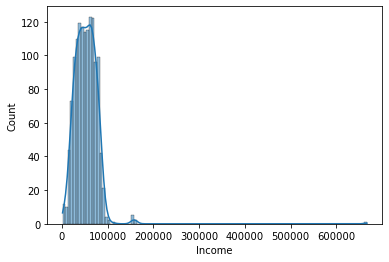

In [28]:
# Check the distribution of data
sns.histplot(data=df_train, x='Income', kde=True)

In [29]:
# Gonna use median, because it's preferrable for skewed distribution and outliers.
df_train['Income'] = df_train['Income'].fillna(value=df_train.Income.median())
df_valid['Income'] = df_valid['Income'].fillna(value=df_valid.Income.median())
df_test['Income'] = df_test['Income'].fillna(value=df_test.Income.median())

Year_Birth                  AxesSubplot(0.125,0.749828;0.133621x0.130172)
Income                   AxesSubplot(0.285345,0.749828;0.133621x0.130172)
Kidhome                   AxesSubplot(0.44569,0.749828;0.133621x0.130172)
Teenhome                 AxesSubplot(0.606034,0.749828;0.133621x0.130172)
Recency                  AxesSubplot(0.766379,0.749828;0.133621x0.130172)
MntWines                    AxesSubplot(0.125,0.593621;0.133621x0.130172)
MntFruits                AxesSubplot(0.285345,0.593621;0.133621x0.130172)
MntMeatProducts           AxesSubplot(0.44569,0.593621;0.133621x0.130172)
MntFishProducts          AxesSubplot(0.606034,0.593621;0.133621x0.130172)
MntSweetProducts         AxesSubplot(0.766379,0.593621;0.133621x0.130172)
MntGoldProds                AxesSubplot(0.125,0.437414;0.133621x0.130172)
NumDealsPurchases        AxesSubplot(0.285345,0.437414;0.133621x0.130172)
NumWebPurchases           AxesSubplot(0.44569,0.437414;0.133621x0.130172)
NumCatalogPurchases      AxesSubplot(0

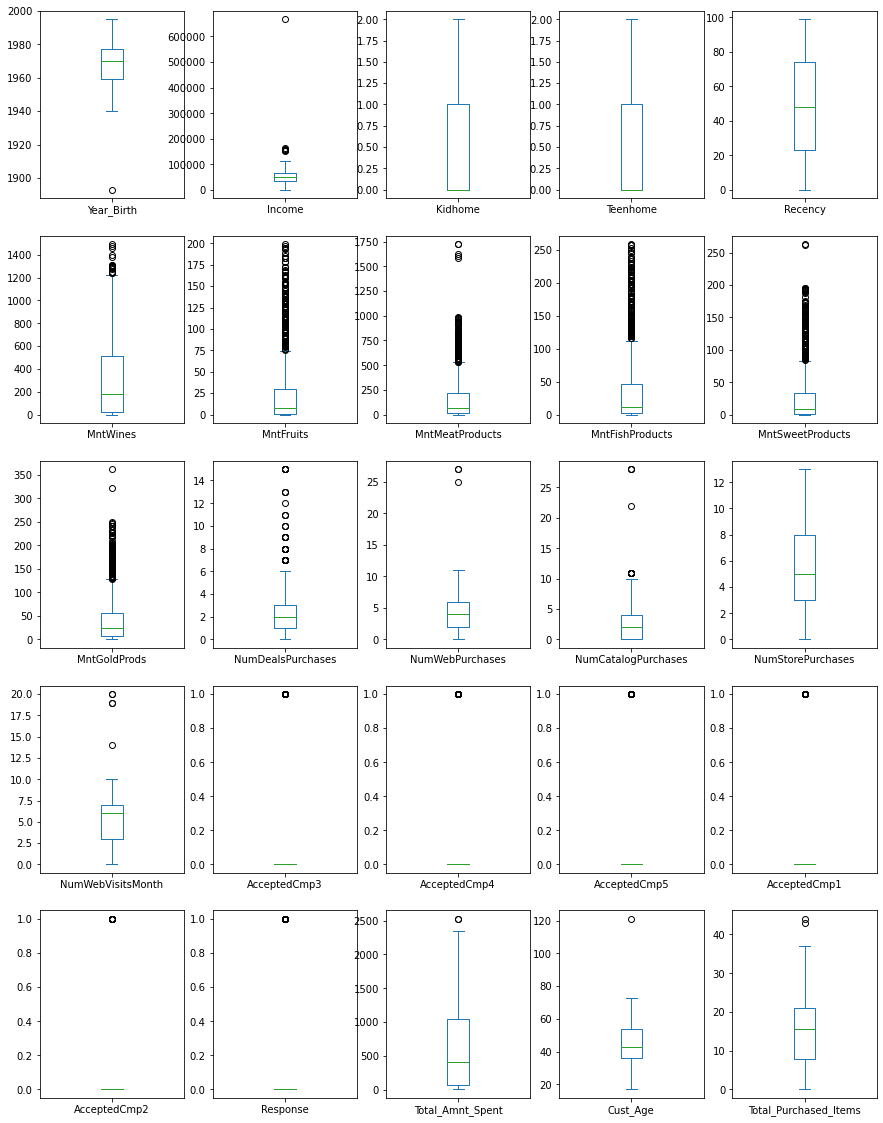

In [30]:
# Check outliers
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot
df_plot_train = df_train.select_dtypes(include=['float64','int64'])
df_plot_train.plot(kind='box', subplots=True, layout=(5,5), figsize=(15,20))                                            

In [34]:
print(df_train.Year_Birth.min(), df_train.Year_Birth.max())

1893 1995


In [53]:
# Remove rows with birth year < 1900
df_train = df_train[ (df_train['Year_Birth'] > 1900) ]

Year_Birth                  AxesSubplot(0.125,0.749828;0.133621x0.130172)
Income                   AxesSubplot(0.285345,0.749828;0.133621x0.130172)
Kidhome                   AxesSubplot(0.44569,0.749828;0.133621x0.130172)
Teenhome                 AxesSubplot(0.606034,0.749828;0.133621x0.130172)
Recency                  AxesSubplot(0.766379,0.749828;0.133621x0.130172)
MntWines                    AxesSubplot(0.125,0.593621;0.133621x0.130172)
MntFruits                AxesSubplot(0.285345,0.593621;0.133621x0.130172)
MntMeatProducts           AxesSubplot(0.44569,0.593621;0.133621x0.130172)
MntFishProducts          AxesSubplot(0.606034,0.593621;0.133621x0.130172)
MntSweetProducts         AxesSubplot(0.766379,0.593621;0.133621x0.130172)
MntGoldProds                AxesSubplot(0.125,0.437414;0.133621x0.130172)
NumDealsPurchases        AxesSubplot(0.285345,0.437414;0.133621x0.130172)
NumWebPurchases           AxesSubplot(0.44569,0.437414;0.133621x0.130172)
NumCatalogPurchases      AxesSubplot(0

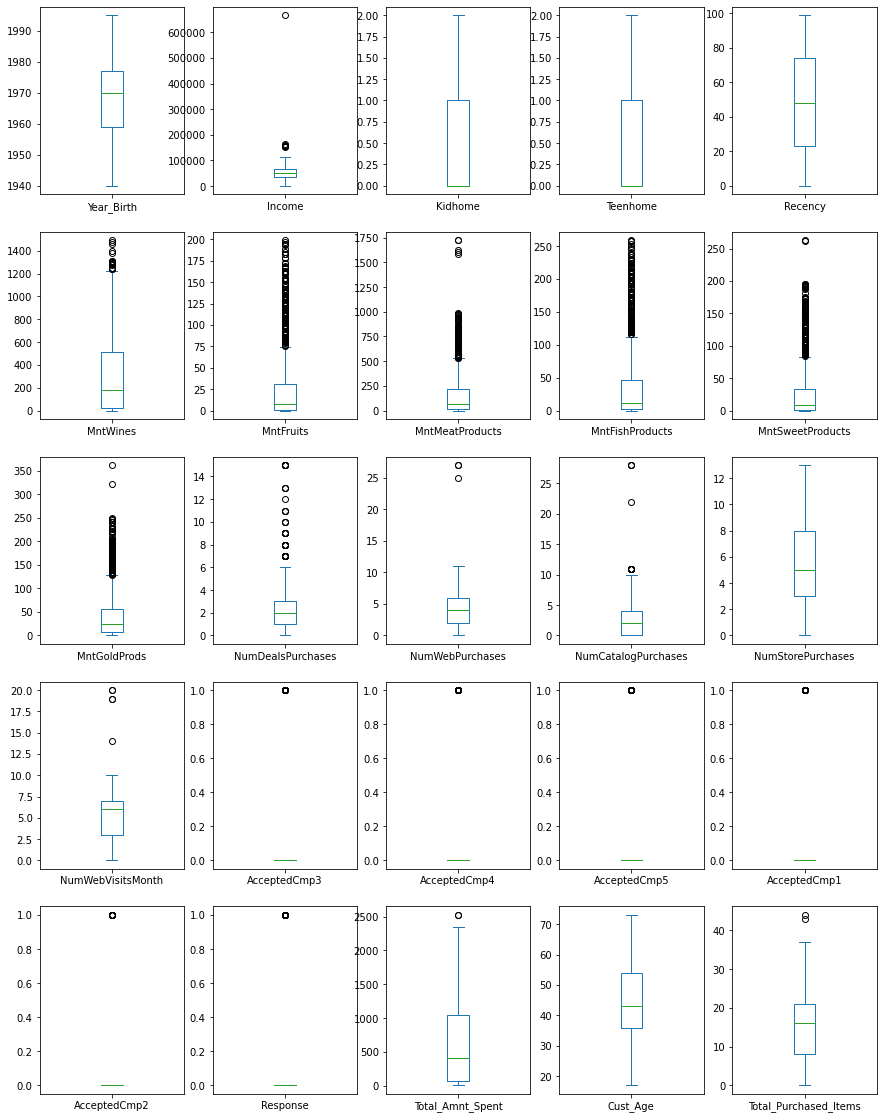

In [62]:
df_plot_train = df_train.select_dtypes(include=['float64','int64'])
df_plot_train.plot(kind='box', subplots=True, layout=(5,5), figsize=(15,20))   

In [64]:
df_valid = df_valid[(df_valid.Year_Birth > 1900)]
df_test = df_test[(df_test.Year_Birth > 1900)]

## Data Insight

In [ ]:
# Pearson corr: For the Pearson correlation, an absolute value of 1 indicates a perfect linear relationship between the variables.
# The larger the absolute value of the coefficient, the stronger the relationship between the variables

In [67]:
df_train.head(5)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Total_Amnt_Spent,Cust_Age,Total_Purchased_Items
1935,1975,2n Cycle,Together,34984.0,1,1,2012-09-06,40,8,4,...,7,0,0,0,0,0,0,38,37,6
1395,1956,Master,Married,63915.0,0,2,2013-07-30,2,622,7,...,5,0,0,0,0,0,0,789,57,23
1359,1971,Master,Single,33316.0,1,1,2013-10-04,34,79,1,...,6,0,0,0,0,0,0,131,42,10
74,1952,Graduation,Married,28332.0,0,0,2014-04-30,58,14,10,...,2,0,0,0,0,0,0,65,62,8
531,1969,Graduation,Single,72679.0,0,1,2013-09-18,65,619,54,...,1,0,0,0,0,0,0,1168,44,17


### Correlation Age with Response

<AxesSubplot:xlabel='Cust_Age', ylabel='Count'>

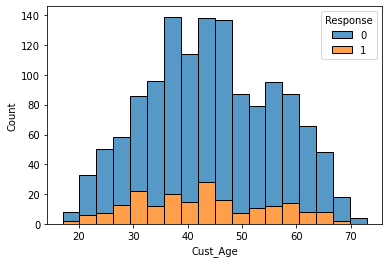

In [72]:
sns.histplot(data=df_train, x='Cust_Age', hue='Response', multiple='stack')
# hypothesis: customer di rentang usia 30 - 50 menerima penawaran campaign lebih banyak

In [103]:
df_train_corr = df_train.corr()[['Cust_Age','Response']]
df_train_corr.loc[['Cust_Age', 'Response'], :]
# hypothesis: korelasi antara umur terhadap variable 'yang menerima penawaran campaign' hampir atau bisa dikatakan tidak ada karena korelasi -0.05 mendekati 0

,Cust_Age,Response
Cust_Age,1.000000,-0.054169
Response,-0.054169,1.000000


In [107]:
df_train_corr_spear = df_train.corr(method='spearman')[['Cust_Age','Response']]
df_train_corr_spear.loc[['Cust_Age', 'Response'], :]

,Cust_Age,Response
Cust_Age,1.000000,-0.055712
Response,-0.055712,1.000000


In [108]:
df_train_corr_kendall = df_train.corr(method='kendall')[['Cust_Age','Response']]
df_train_corr_kendall.loc[['Cust_Age', 'Response'], :]

,Cust_Age,Response
Cust_Age,1.000000,-0.046032
Response,-0.046032,1.000000
